# Зание 4 - Визуализация геораспределенных данных

In [1]:
%matplotlib inline

In [2]:
from IPython.display import IFrame

In [3]:
ls

Meeting_04.ipynb  README.md  S_25.nc


In [4]:
!ncview S_25.nc

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0.0"
      after 497 requests (497 known processed) with 0 events remaining.


In [5]:
from netCDF4 import Dataset

In [6]:
f = Dataset('S_25.nc')

In [7]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.1
    file_name: BS_Pitm_1d_20050101_20061231_grid_T.nc
    production: An IPSL model
    TimeStamp: 2015-JUL-27 16:25:35 GMT+0300
    CDO: Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): lon(238), lat(147), deptht(1), time_counter(212), bnds(2)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 deptht(deptht), float64 time_counter(time_counter), float64 time_counter_bnds(time_counter,bnds), float32 vosaline(time_counter,deptht,lat,lon)
    groups: 



In [8]:
IFrame('https://en.wikipedia.org/wiki/NetCDF',width='100%', height=300)

In [9]:
print(f.variables)

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (238,)
filling off
), ('lat', <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (147,)
filling off
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float64 deptht(deptht)
    long_name: Vertical T levels
    units: m
    axis: Z
unlimited dimensions: 
current shape = (1,)
filling off
), ('time_counter', <class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
    standard_name: time
    long_name: Time axis
    bounds: time_counter_bnds
    units: seconds since 2005-1-1 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time_counter
current shape = (212,)
filling off
), ('time_counter_bnds', <class 'netCDF4._netCDF4.Variable'>
fl

In [10]:
salt = f.variables['vosaline']

In [11]:
help(salt)

Help on Variable object:

class Variable(builtins.object)
 |  A netCDF `netCDF4.Variable` is used to read and write netCDF data.  They are
 |  analogous to numpy array objects. See `netCDF4.Variable.__init__` for more
 |  details.
 |  
 |  A list of attribute names corresponding to netCDF attributes defined for
 |  the variable can be obtained with the `netCDF4.Variable.ncattrs` method. These
 |  attributes can be created by assigning to an attribute of the
 |  `netCDF4.Variable` instance. A dictionary containing all the netCDF attribute
 |  name/value pairs is provided by the `__dict__` attribute of a
 |  `netCDF4.Variable` instance.
 |  
 |  The following class variables are read-only:
 |  
 |  **`dimensions`**: A tuple containing the names of the
 |  dimensions associated with this variable.
 |  
 |  **`dtype`**: A numpy dtype object describing the
 |  variable's data type.
 |  
 |  **`ndim`**: The number of variable dimensions.
 |  
 |  **`shape`**: A tuple with the current shape (

In [12]:
salt.shape

(212, 1, 147, 238)

In [13]:
s0 = salt[0,0]

In [14]:
import matplotlib.pyplot as plt

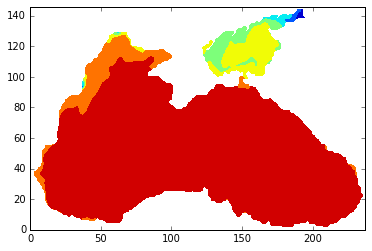

In [15]:
plt.contourf(s0)

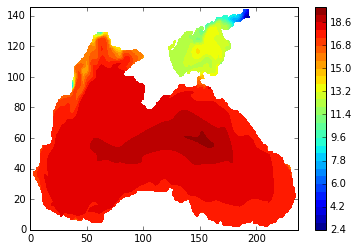

In [16]:
plt.contourf(s0,30)
plt.colorbar()

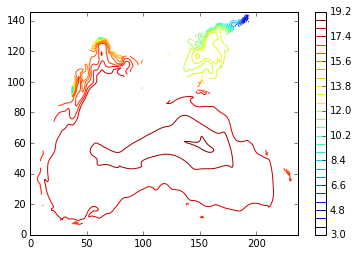

In [17]:
plt.contour(s0,30)
plt.colorbar()

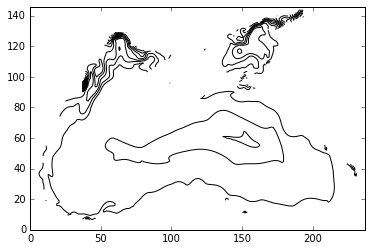

In [18]:
plt.contour(s0,30,colors='k')

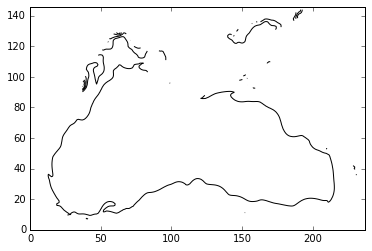

In [19]:
plt.contour(s0,levels=[4,5,6,10,12,14,16,18],colors='k')

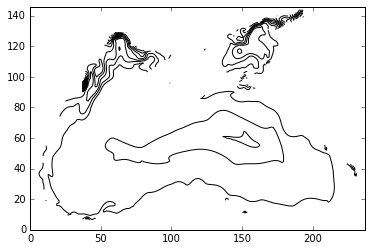

In [20]:
cs = plt.contour(s0,30,colors='k')

In [21]:
help(cs)

Help on QuadContourSet in module matplotlib.contour object:

class QuadContourSet(ContourSet)
 |  Create and store a set of contour lines or filled regions.
 |  
 |  User-callable method: :meth:`clabel`
 |  
 |  Useful attributes:
 |    ax:
 |      The axes object in which the contours are drawn
 |  
 |    collections:
 |      A silent_list of LineCollections or PolyCollections
 |  
 |    levels:
 |      Contour levels
 |  
 |    layers:
 |      Same as levels for line contours; half-way between
 |      levels for filled contours.  See :meth:`_process_colors` method.
 |  
 |  Method resolution order:
 |      QuadContourSet
 |      ContourSet
 |      matplotlib.cm.ScalarMappable
 |      ContourLabeler
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ax, *args, **kwargs)
 |      Calculate and draw contour lines or filled regions, depending
 |      on whether keyword arg 'filled' is False (default) or True.
 |      
 |      The first argument of the initializ

<a list of 3 text.Text objects>

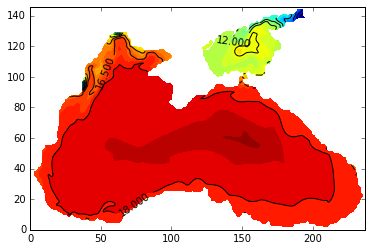

In [22]:
plt.contourf(s0,30)
cc = plt.contour(s0,15,colors='k')
plt.clabel(cc)


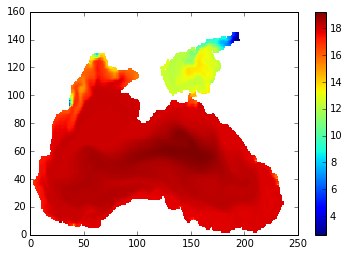

In [23]:
plt.pcolor(s0)
plt.colorbar()

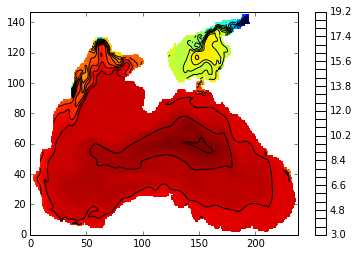

In [24]:
plt.pcolor(s0)
cc = plt.contour(s0,30,colors='k')
plt.colorbar()

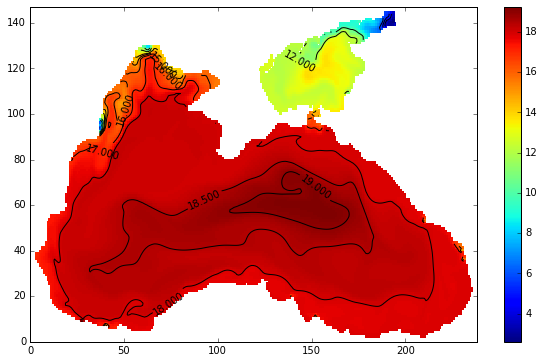

In [25]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(s0)
cc = ax.contour(s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
plt.clabel(cc)
plt.colorbar(pc)

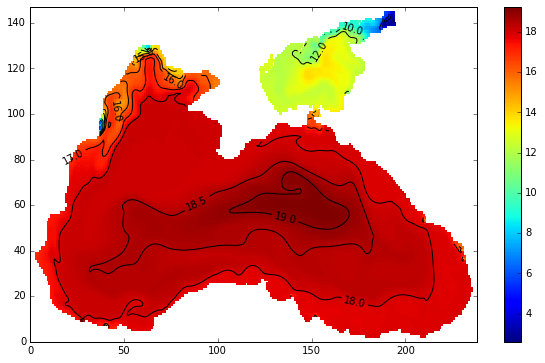

In [26]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(s0)
cc = ax.contour(s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

In [27]:
plt.clabel?

In [28]:
help(ax)

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner and increases to the right.
 |      
 |     

Нам не хватает координат!

In [29]:
f.variables

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
              float64 lon(lon)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (238,)
              filling off), ('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (147,)
              filling off), ('deptht', <class 'netCDF4._netCDF4.Variable'>
              float64 deptht(deptht)
                  long_name: Vertical T levels
                  units: m
                  axis: Z
              unlimited dimensions: 
              current shape = (1,)
              filling off), ('time_counter',
              <class 'netCDF4._netCDF4.Va

In [30]:
lon,lat = f.variables['lon'][:],f.variables['lat'][:]

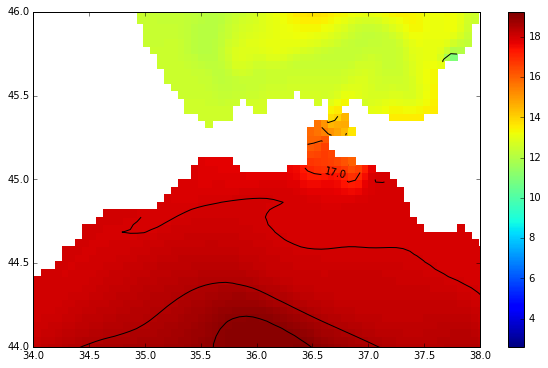

In [31]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(lon,lat,s0)
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
ax.set_ylim([44,46])
ax.set_xlim([34,38])
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

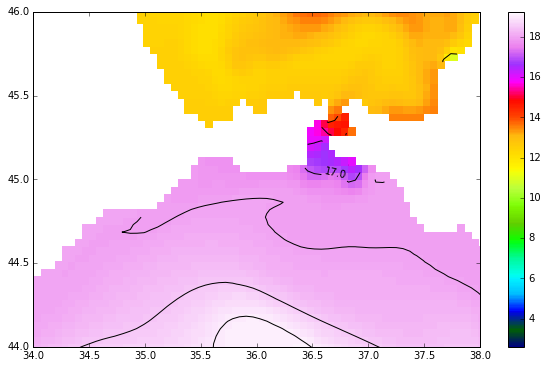

In [32]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(lon,lat,s0,cmap = plt.cm.gist_ncar)
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
ax.set_ylim([44,46])
ax.set_xlim([34,38])
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

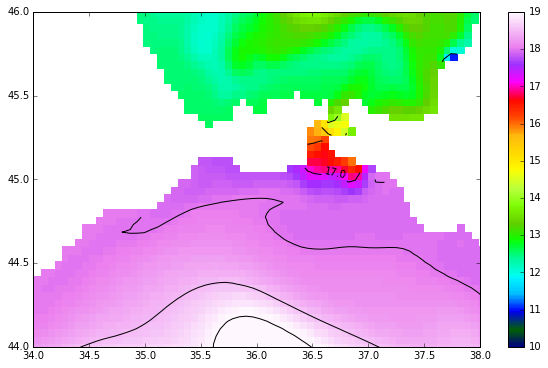

In [33]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(lon,lat,s0,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
ax.set_ylim([44,46])
ax.set_xlim([34,38])
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

(34, 38)

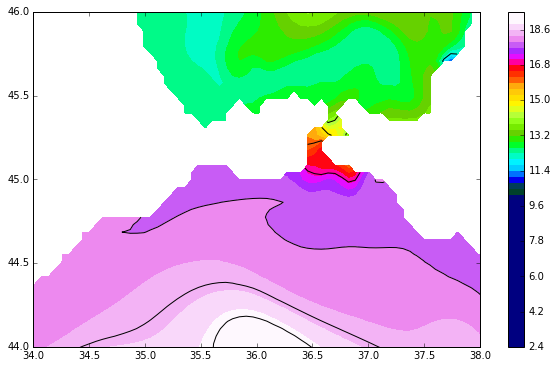

In [34]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.contourf(lon,lat,s0,60,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)
ax.set_ylim([44,46])
ax.set_xlim([34,38])

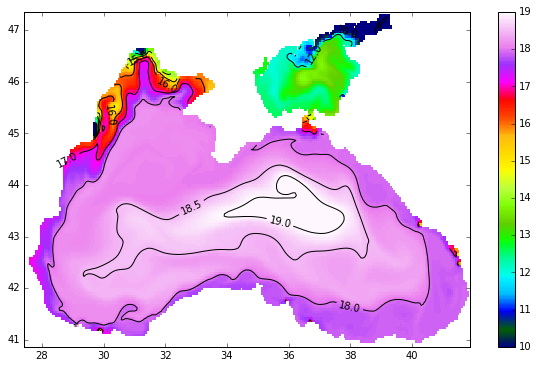

In [35]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(lon,lat,s0,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

In [36]:
s1 = salt[70,0]

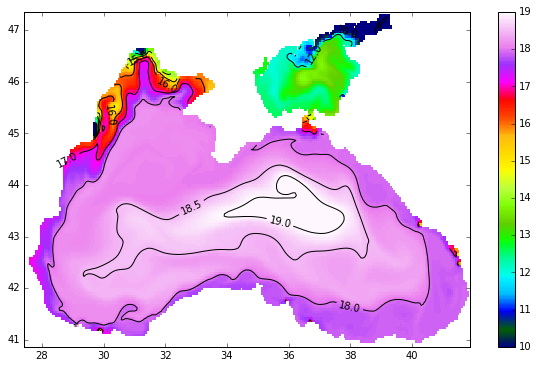

In [37]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(lon,lat,s0,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

In [38]:
from matplotlib.colors import PowerNorm, LogNorm

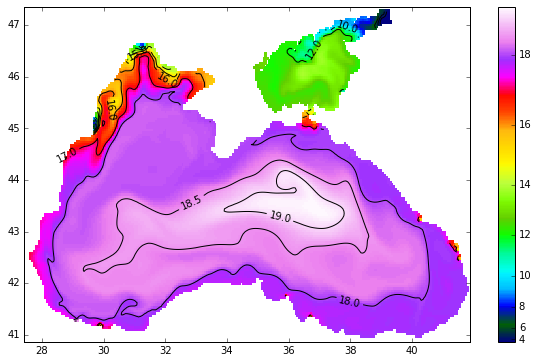

In [39]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(lon,lat,s0,cmap = plt.cm.gist_ncar,norm = PowerNorm(2))
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

In [40]:
plt.colorbar?

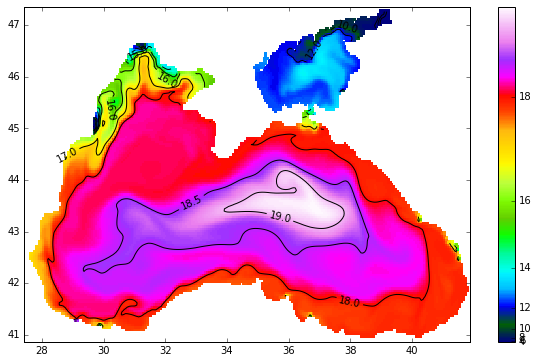

In [41]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(lon,lat,s0,cmap = plt.cm.gist_ncar,norm = PowerNorm(4))
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

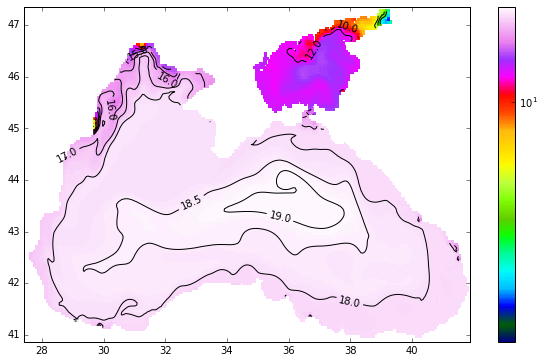

In [42]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
pc = ax.pcolor(lon,lat,s0,cmap = plt.cm.gist_ncar,norm = LogNorm(vmin = 2,vmax = 19))
cc = ax.contour(lon,lat,s0,levels=[4,5,6,10,12,14,15,16,17,18,18.5,19],colors='k')
plt.clabel(cc,fmt='%3.1f')
plt.colorbar(pc)

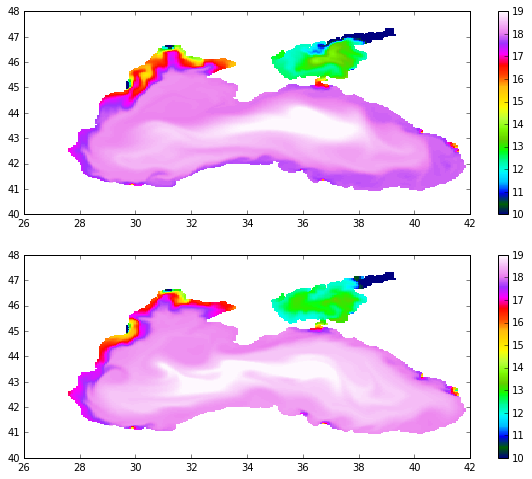

In [43]:
fig,ax = plt.subplots(figsize=(10,8),nrows=2)
plt.sca(ax[0])
pc1 = plt.pcolor(lon,lat,s0,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)
plt.colorbar(pc1)
plt.sca(ax[1])
pc2 = plt.pcolor(lon,lat,s1,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)
plt.colorbar(pc2)

Видно, что море у нас постоянно меняет форму. Это неправильно!
Геораспределенные данные нужно строить с использованием картографических проекций!

In [44]:
from mpl_toolkits.basemap import Basemap


In [45]:
m = Basemap(projection='merc', resolution='i',llcrnrlon = lon.min(), llcrnrlat = lat.min(),
                    urcrnrlon = lon.max(), urcrnrlat = lat.max())

In [46]:
lon.shape

(238,)

In [47]:
import numpy as np

In [48]:
lon2,lat2 = np.meshgrid(lon,lat)

In [49]:
X,Y = m(lon2,lat2)

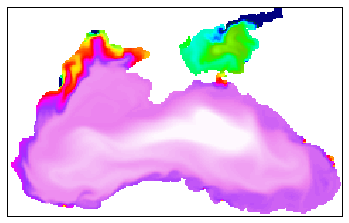

In [50]:
m.pcolor(X,Y,s0,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)

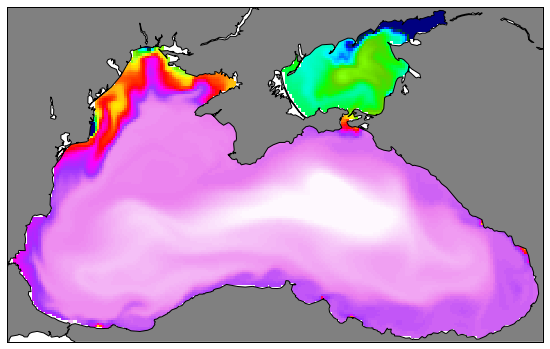

In [51]:
plt.figure(figsize=(10,6))
m.pcolor(X,Y,s0,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)
m.drawcoastlines()
_ = m.fillcontinents('0.5')

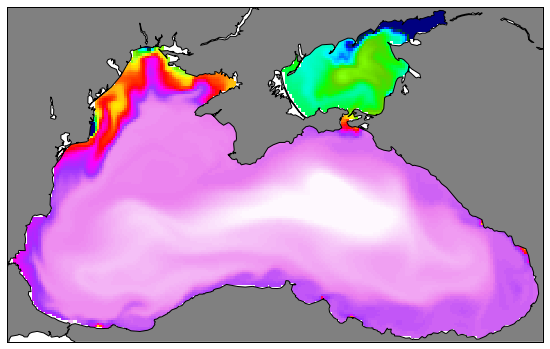

In [52]:
plt.figure(figsize=(10,6))
m.pcolor(X,Y,s0,cmap = plt.cm.gist_ncar,vmin=10,vmax=19)
m.drawcoastlines()
_ = m.fillcontinents('0.5')
#m.drawparallels(np.arange(20.,50.,1.),labels=[1,0,1,0])
#m.drawmeridians(np.arange(20.,50.,2),labels=[0,1,0,1])
#m.drawrivers()